In [75]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from src.phase_decoder_support import *
from src.neural_analysis import *
from src.wiener_filter import *
from src.folder_handler import *
from src.tdt_support import *
from src.decoders import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
rollie1129 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1129')
rollie1129.process()

read from t=0s to t=371.88s
read from t=0s to t=352.3s


(array([[ 20.,  80.,  20., ...,  40.,  20.,  20.],
        [ 20.,  40.,   0., ...,  20.,  20.,  60.],
        [  0.,  40.,  40., ..., 140.,  20.,  40.],
        ...,
        [ 20.,   0.,   0., ...,  20.,  20.,   0.],
        [ 40.,  40.,   0., ...,  20.,  40.,  80.],
        [  0.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[167.48464387,  63.85915525,  85.57627118, ...,  61.62516639,
          82.02233546, 160.45151816],
        [162.68903079,  67.16539274,  79.07084519, ...,  59.99230052,
          76.71208209, 165.0244428 ],
        [163.31619854,  55.54741612,  84.60433203, ...,  64.38591679,
          82.54450781, 163.78877682],
        ...,
        [147.91989055,  54.29923447, 103.29290928, ...,  74.90590892,
          96.67447058, 159.89321414],
        [144.20502153,  54.43811062, 104.45613898, ...,  75.77255941,
          98.28704118, 158.96151146],
        [142.76760199,  54.96163038, 106.93983068, ...,  76.36840837,
         106.24960909, 164.28462118]]))

In [71]:
h_sin, h_cos, r2, predicted_arctans, test_arctans, test_rates = rollie1129.decode_phase(metric_angle="knee")

In [72]:
# tst = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
# fig, axs = plt.subplots(2, 1, figsize=(8,10), sharex= True)
# axs[0].set_title('rollie 11/29 knee phase prediction (test_r2 = 0.49)')
# axs[0].plot(tst, test_arctans[:,1], c='black', alpha = 0.8)
# axs[0].plot(tst, predicted_arctans[:,1], c='blue', alpha = 0.7)
# axs[0].set_ylabel('degree')
# axs[0].set_xlabel('time (s)')
# axs[1].set_title('| prediction - actual |')
# axs[1].plot(tst, abs(predicted_arctans[:,1]-test_arctans[:,1]), c='blue', alpha = 0.7)

In [73]:
# original_data = test_rates
# data_length = original_data.shape[0]
# shuf_order = np.arange(data_length)
# np.random.shuffle(shuf_order)
# shuffled_data = original_data[shuf_order] 

# shuff_predicted_sin = predicted_lines(shuffled_data, h_sin)
# shuff_predicted_cos = predicted_lines(shuffled_data, h_cos)
# shuff_predicted_arctans = arctan_fn(shuff_predicted_sin, shuff_predicted_cos)

# unshuf_order = np.zeros_like(shuf_order)
# unshuf_order[shuf_order] = np.arange(data_length)
# unshuffled_data = shuff_predicted_arctans[unshuf_order]

# tst = np.linspace(0, (test_arctans.shape[0]*50)/1000,test_arctans.shape[0])
# fig, axs = plt.subplots(1, 1, figsize=(8,10), sharex= True)
# axs.set_title('rollie 11/29 knee phase prediction (test_r2 = 0.49)')
# axs.plot(tst, unshuffled_data[:,1], c='black', alpha = 0.8)
# axs.plot(tst, predicted_arctans[:,1], c='blue', linestyle = '--', alpha = 0.7)
# # axs.plot(tst, shuff_predicted_arctans[:,1], c='red', linestyle = '--', alpha = 0.7)

# axs.set_ylabel('degree')
# axs.set_xlabel('time (s)')

In [77]:
# full_rates, full_angles = rollie1129.stitch_and_format(rollie1129.data['rates'], rollie1129.data['angles'])
# print(full_rates.shape)

(12848, 320)


In [79]:
# _, _, _, _, _, _, phase_list = rollie1129.decode_phase()

In [80]:
# angle_number = 2

# sin_array, cos_array = sine_and_cosine(phase_list)


# original_data = full_rates
# data_length = original_data.shape[0]
# shuf_order = np.arange(data_length)
# np.random.shuffle(shuf_order)
# shuffled_X = original_data[shuf_order] 
# shuffled_sin = sin_array[shuf_order] 
# shuffled_cos = cos_array[shuf_order] 

# shuf_h_sin, _, _, _, shuf_sin_test_index = decode_kfolds(X=shuffled_X, Y=shuffled_sin, metric_angle=angle_number, vaf_scoring=False)
# shuf_h_cos, _, _, _, _ = decode_kfolds(X=shuffled_X, Y=shuffled_cos, metric_angle=angle_number, vaf_scoring=False, forced_test_index = shuf_sin_test_index)
# shuff_predicted_sin = predicted_lines(full_rates, shuf_h_sin)
# shuff_predicted_cos = predicted_lines(full_rates, shuf_h_cos)
# shuff_predicted_arctans = arctan_fn(shuff_predicted_sin, shuff_predicted_cos)

# h_sin, r2_sin, test_rates, test_sin, sin_test_index = decode_kfolds(X=full_rates, Y=sin_array, metric_angle=angle_number, vaf_scoring=False)
# h_cos, r2_cos, _, test_cos, _ = decode_kfolds(X=full_rates, Y=cos_array, metric_angle=angle_number, vaf_scoring=False, forced_test_index = sin_test_index)
# predicted_sin = predicted_lines(full_rates, h_sin)
# predicted_cos = predicted_lines(full_rates, h_cos)
# predicted_arctans = arctan_fn(predicted_sin, predicted_cos)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
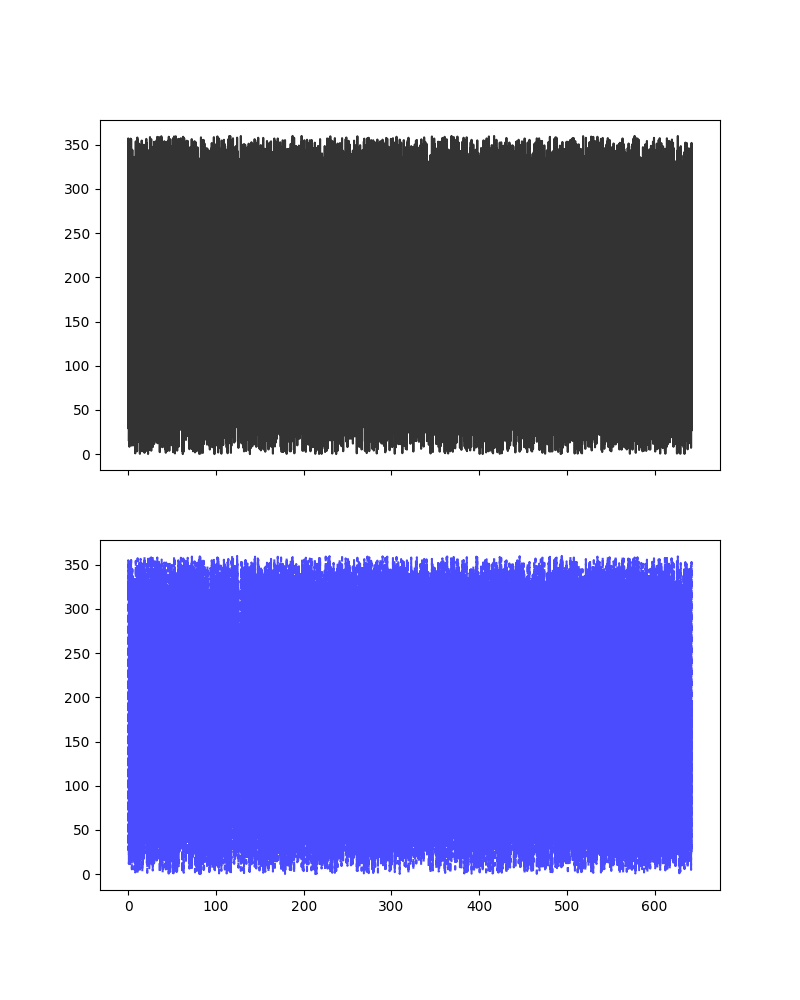

In [83]:
# tsf = np.linspace(0, (phase_list.shape[0]*50)/1000,phase_list.shape[0])
# fig, axs = plt.subplots(2, 1, figsize=(8,10), sharex= True)
# # axs.set_title('rollie 11/29 knee phase prediction (test_r2 = 0.49)')
# axs[0].plot(tsf, predicted_arctans[:,1], c='black', alpha = 0.8)
# axs[1].plot(tsf, shuff_predicted_arctans[:,1], c='blue', linestyle = '--', alpha = 0.7)
# # axs.plot(tst, shuff_predicted_arctans[:,1], c='red', linestyle = '--', alpha = 0.7)

In [4]:
rollie1209 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1209')
rollie1209.process()

read from t=0s to t=327.92s
read from t=0s to t=237.33s
read from t=0s to t=184.62s


(array([[ 40., 140.,  20., ..., 100.,  60.,  80.],
        [  0., 120.,   0., ...,  20.,  60.,  40.],
        [ 20.,  60.,  20., ...,   0.,   0.,  20.],
        ...,
        [  0.,   0., 100., ...,   0.,   0.,  20.],
        [ 20.,  40.,  40., ...,  20.,   0.,   0.],
        [ 60.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[139.71233495,  46.34049354, 105.21713   , ...,  77.90241092,
          77.42988387, 135.21609212],
        [145.34645341,  43.35477217, 107.14311525, ...,  78.81609535,
          66.54702068, 110.59363493],
        [142.81152867,  43.73290348, 106.10764914, ...,  87.40366439,
          67.71379361, 112.04275624],
        ...,
        [160.64578834,  48.2641632 , 103.63358822, ..., 106.50083528,
          68.82975072, 105.78564332],
        [163.86043802,  52.47052865,  96.06072894, ..., 115.07670079,
          70.63218898, 103.00192999],
        [166.57685486,  77.41210747,  91.99311747, ...,  98.65296947,
          69.0261878 , 103.34361708]]))

In [5]:
r2_1209, test_arctans_1209, test_phase_1209, _, _, _, _, _ = rollie1209.decode_phase()

In [6]:
rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1216')
rollie1216.process()

read from t=0s to t=345.41s
read from t=0s to t=360.07s


(array([[ 60.,  20.,  60., ...,  40.,  60.,  60.],
        [ 60., 100., 100., ...,  20.,  40., 120.],
        [ 40., 120.,  80., ...,  40.,   0., 120.],
        ...,
        [ 40.,  20.,   0., ...,  60.,  20.,  20.],
        [  0.,  40.,  60., ...,   0.,   0.,  20.],
        [ 20.,  20.,  40., ...,  20.,  40.,  40.]]),
 array([[165.04212637,  62.05968537,  68.01284291, ...,  88.44347268,
          77.77221799, 125.00880864],
        [160.80700108,  76.4108133 ,  68.46222572, ..., 115.92204272,
          68.26463126,  97.59397445],
        [165.82847801,  90.56513028,  68.26985874, ..., 113.70652281,
          71.22853429,  98.90918859],
        ...,
        [161.89538783,  58.82980113,  63.46532531, ...,  56.20058932,
          90.54743637, 170.73173551],
        [157.370791  ,  53.93712258,  65.16367026, ...,  54.73827367,
          87.52572024, 171.54052801],
        [151.05325149,  48.35280331,  65.28979724, ...,  55.52980295,
          77.94177814, 150.82884125]]))

In [7]:
r2_1216, test_arctans_1216, test_phase_1216, _, _, _, _, _ = rollie1216.decode_phase()

In [8]:
rollie1220 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1220')
rollie1220.process()

read from t=0s to t=342.9s
read from t=0s to t=374.4s


(array([[ 80.,  60., 140., ...,  60.,  60.,  40.],
        [ 40.,  60.,  20., ...,  60., 120.,  80.],
        [  0.,  40.,  20., ...,  40., 100.,  60.],
        ...,
        [ 20.,  40.,   0., ...,   0.,  20.,   0.],
        [  0.,   0.,  20., ...,   0.,   0.,  20.],
        [120.,   0., 100., ...,   0., 100.,  40.]]),
 array([[155.18008942,  62.31714595, 124.58387345, ...,  39.84568486,
         123.52170626, 146.73617002],
        [144.70160036,  64.46756092, 171.69413784, ...,  16.29213078,
         151.63924658, 140.44733846],
        [142.00795507,  57.59573013, 147.14232081, ...,  22.70757773,
         145.95248501, 139.58505765],
        ...,
        [158.12726101,  76.46171251,  96.31090285, ..., 104.91160728,
          90.27138438, 125.4602608 ],
        [162.82654766,  86.69692307,  97.59230142, ...,  91.3241497 ,
          87.43559725, 130.96974981],
        [163.71225636,  87.92152975,  92.2227918 , ...,  83.59751062,
          97.35160338, 160.5808409 ]]))

In [9]:
r2_1220, test_arctans_1220, test_phase_1220, _, _, _, H_sin_1220, _ = rollie1220.decode_phase()

In [10]:
morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
morbo1101.process()

read from t=0s to t=339.5s
read from t=0s to t=341.15s
read from t=0s to t=261.62s


(array([[ 0.,  0., 20., ...,  0., 20.,  0.],
        [20.,  0., 20., ..., 40., 20., 20.],
        [20., 20., 20., ..., 20., 40.,  0.],
        ...,
        [20., 40.,  0., ..., 40., 60.,  0.],
        [ 0.,  0.,  0., ...,  0., 20.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([[124.07356073, 117.61060638,  68.90063065, ..., 148.9697519 ,
         112.97915264, 131.62872692],
        [103.28817058, 162.25930834,  66.38986122, ..., 160.24151976,
          84.13709795, 104.65441538],
        [119.89011595, 151.95560136,  74.01746214, ..., 163.13699287,
          92.0517567 , 109.08478231],
        ...,
        [174.25763527,  79.21409429,  66.0450305 , ..., 126.03381644,
         137.16740259, 172.0077332 ],
        [169.47726242,  68.03192305,  68.24421978, ..., 131.20056386,
         134.60692845, 164.85959337],
        [161.75509448,  58.00369267,  67.90018574, ..., 137.6231556 ,
         124.66871599, 151.14402449]]))

In [11]:
r2, test_arctans, test_phase, test_rates, full_rates, full_phase_list, h_sin, h_cos = morbo1101.decode_phase()

In [12]:
print(r2_1129)
print(r2_1209)
print(r2_1216)
print(r2_1220)

print(r2)


[0.1800592660703645, 0.46485344860574335, 0.2975128999358193, 0.32882302125740254, 0.2856777982778373, 0.3026322937512896, 0.2584266512888805, 0.3347762759612469]
[0.21298089925176678, 0.44522832281752855, 0.2758086869501691, 0.30010506145246313, 0.19250861717060758, 0.2935570723545166, 0.13990008298864742, 0.28530400814369766]
[0.3473675609091353, 0.580895079540347, 0.23312559270707617, 0.431394654827395, 0.3721281583789097, 0.43485393901971614, 0.33739859833556407, 0.4271142526294017]
[0.07417523147966198, 0.6215639237271353, 0.46474686022997336, 0.29732661357344276, 0.3873732149545285, 0.47880679535827375, 0.27325383990718083, 0.4261800287081415]
[0.06655966774140465, 0.15379673145194095, -0.020975849911301747, 0.07661366236894729, 0.03294843148044069, 0.08606491523579612, 0.06675609428366008, 0.11145984998887942]


In [13]:
print(rollie1216.data['angle_names'])
print(morbo1101.data['angle_names'])

['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']
['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']


array([[-0.05879256, -0.05923828, -0.05958417, -0.05954642, -0.05946361,
        -0.0592931 , -0.0590049 , -0.05891351, -0.05899215, -0.05899779,
        -0.05918265, -0.05918265, -0.05918265],
       [-0.05781525, -0.05831242, -0.05889857, -0.05929372, -0.05938024,
        -0.05922429, -0.05899261, -0.05876592, -0.05880803, -0.05884257,
        -0.05883336, -0.05883336, -0.05883336],
       [-0.05704727, -0.05755839, -0.05812423, -0.0587392 , -0.05935683,
        -0.05999329, -0.06033759, -0.06024581, -0.05972101, -0.0590694 ,
        -0.0590193 , -0.0590193 , -0.0590193 ],
       [-0.05888303, -0.05863976, -0.05861737, -0.0586044 , -0.05881069,
        -0.05898162, -0.05903112, -0.05894688, -0.05896155, -0.05899934,
        -0.05884757, -0.05884757, -0.05884757],
       [-0.05830514, -0.05814631, -0.05830636, -0.05870457, -0.059063  ,
        -0.05946879, -0.05978959, -0.05980053, -0.0594252 , -0.05906864,
        -0.05900781, -0.05900781, -0.05900781],
       [-0.05880136, -0.058769

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
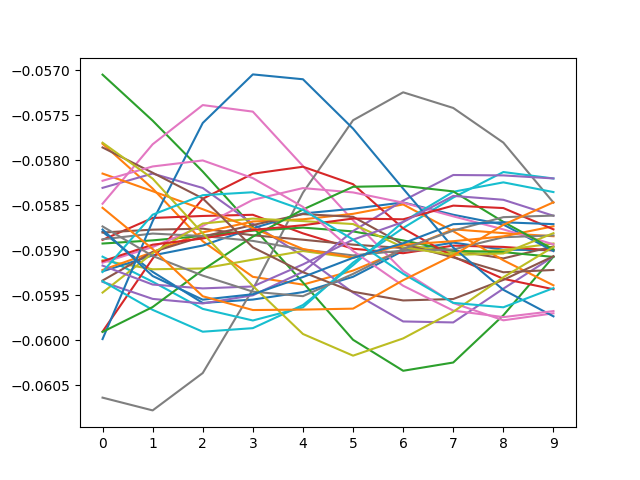

In [14]:
morbo1101.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
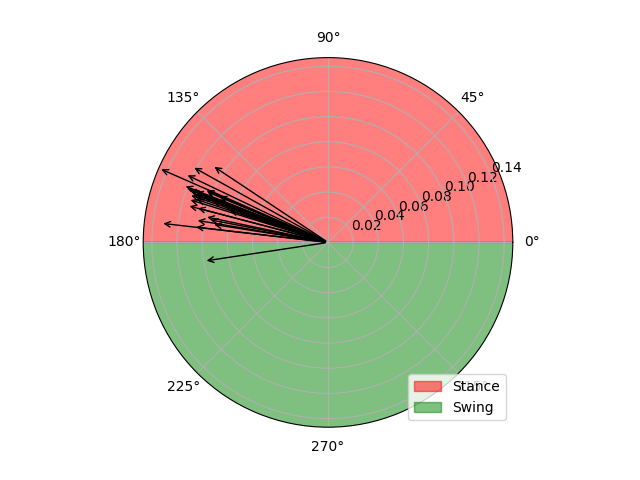

In [15]:
# _, _ = morbo1101.DOM(angle_name = 'limbfoot')
_, _ = morbo1101.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
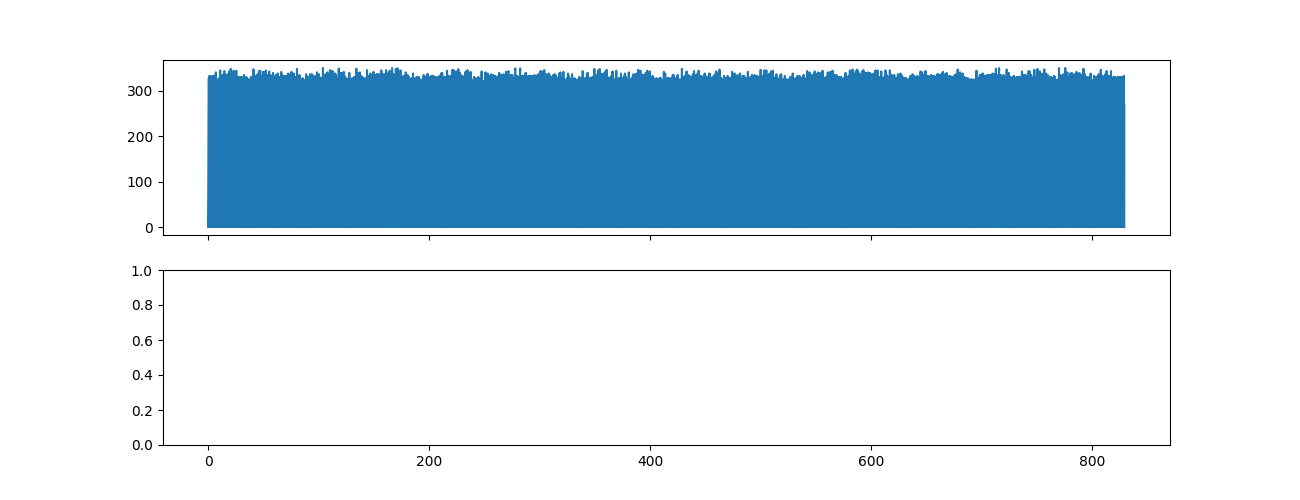

In [16]:
tsf = np.linspace(0, (full_phase_list.shape[0]*50)/1000,full_phase_list.shape[0])
fig0, ax = plt.subplots(2,1, figsize=(13,5),sharex = True)
ax[0].plot(tsf, full_phase_list[:,1])



Text(0.5, 0, 'time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
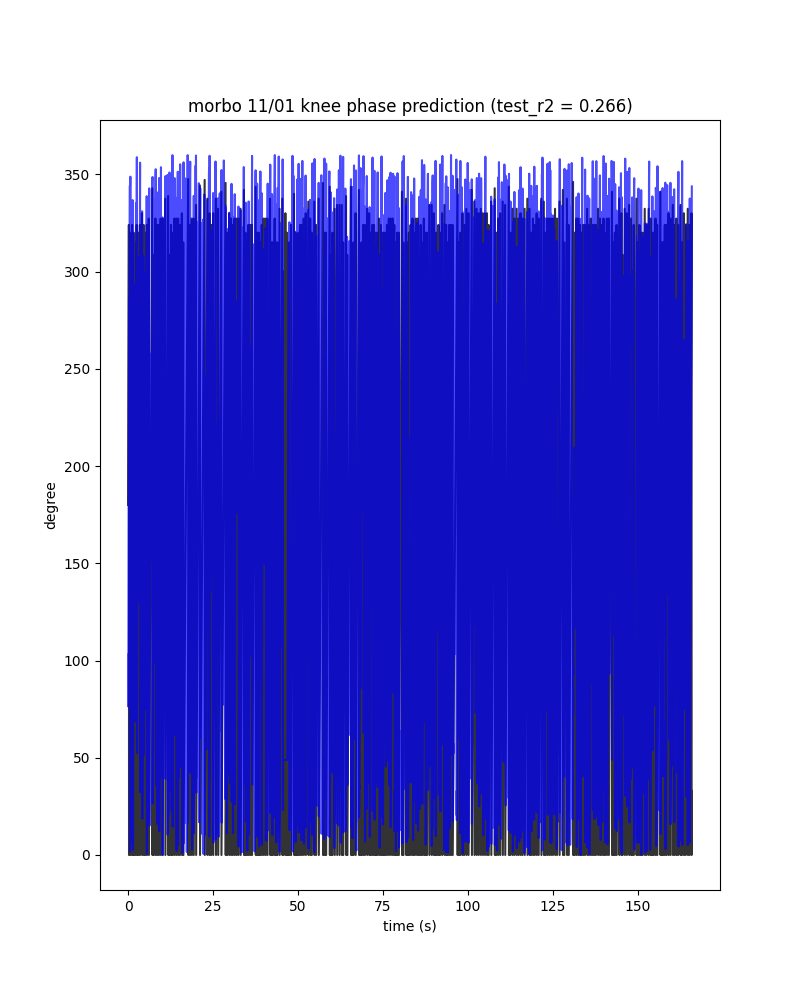

In [17]:
tstt = np.linspace(0, (test_phase.shape[0]*50)/1000,test_phase.shape[0])
fig, axs = plt.subplots(1, 1, figsize=(8,10), sharex= True)
axs.set_title('morbo 11/01 knee phase prediction (test_r2 = 0.266)')
axs.plot(tstt, test_phase[:,1], c='black', alpha = 0.8)
axs.plot(tstt, test_arctans[:,1], c='blue', alpha = 0.7)
axs.set_ylabel('degree')
axs.set_xlabel('time (s)')


Text(0.5, 0, 'time (s)')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
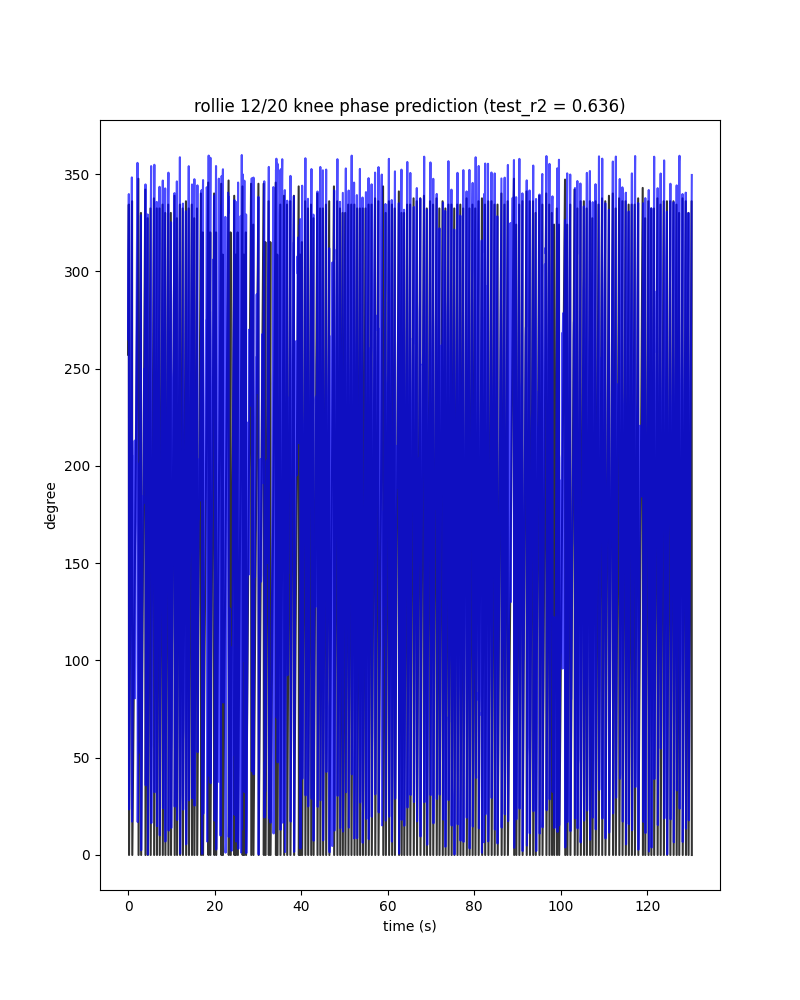

In [18]:
tst = np.linspace(0, (test_phase_1220.shape[0]*50)/1000,test_phase_1220.shape[0])
fig, axs = plt.subplots(1, 1, figsize=(8,10), sharex= True)
axs.set_title('rollie 12/20 knee phase prediction (test_r2 = 0.636)')
axs.plot(tst, test_phase_1220[:,1], c='black', alpha = 0.8)
axs.plot(tst, test_arctans_1220[:,1], c='blue', alpha = 0.7)
axs.set_ylabel('degree')
axs.set_xlabel('time (s)')

# tstt = np.linspace(0, (test_phase.shape[0]*50)/1000,test_phase.shape[0])
# axs[1].set_title('morbo 11/01 knee phase prediction (test_r2 = 0.266)')
# axs[1].plot(tstt, test_phase[:,1], c='black', alpha = 0.8)
# axs[1].plot(tstt, test_arctans[:,1], c='blue', alpha = 0.7)
# axs[1].set_ylabel('degree')
# axs[1].set_xlabel('time (s)')


# axs[1].set_title('1101 knee phase (variable speed, r = 0.27')
# axs[1].plot(tsf_1101, act_1101[:,1], c='black', alpha = 0.8)
# axs[1].plot(tsf_1101, pred_1101[:,1], c='blue', linestyle = '--', alpha = 0.7)

array([[-0.04378536, -0.04392907, -0.04392756, -0.04381897, -0.04383219,
        -0.04384922, -0.0438767 , -0.04397598, -0.04398335, -0.04394522,
        -0.04389236, -0.04389236, -0.04389236, -0.04389236, -0.04389236],
       [-0.04471862, -0.04456601, -0.04424136, -0.04399852, -0.04354422,
        -0.0433601 , -0.0432516 , -0.04333936, -0.04353955, -0.04382455,
        -0.04383839, -0.04383839, -0.04383839, -0.04383839, -0.04383839],
       [-0.04418109, -0.04402741, -0.04393195, -0.04392728, -0.04388648,
        -0.04382554, -0.04375633, -0.04370176, -0.04359962, -0.04360048,
        -0.04384379, -0.04384379, -0.04384379, -0.04384379, -0.04384379],
       [-0.04468473, -0.04421265, -0.04364783, -0.04317006, -0.04301129,
        -0.04300233, -0.04314118, -0.04334451, -0.0434759 , -0.04373512,
        -0.04354256, -0.04354256, -0.04354256, -0.04354256, -0.04354256],
       [-0.04448614, -0.0440359 , -0.04366171, -0.04335366, -0.04313796,
        -0.04310303, -0.04315707, -0.04330231, 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
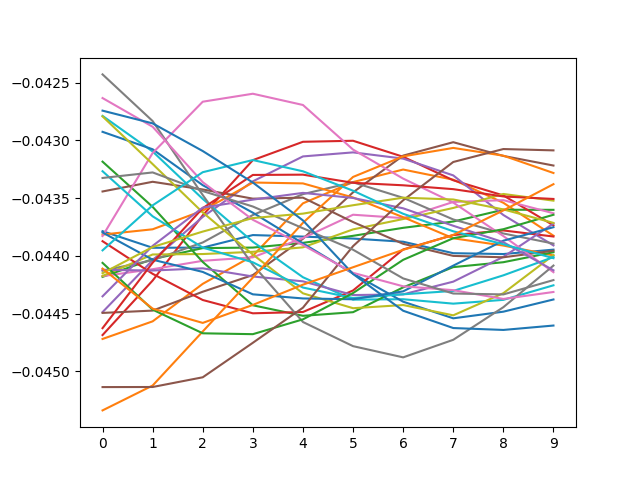

In [19]:
rollie1220.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
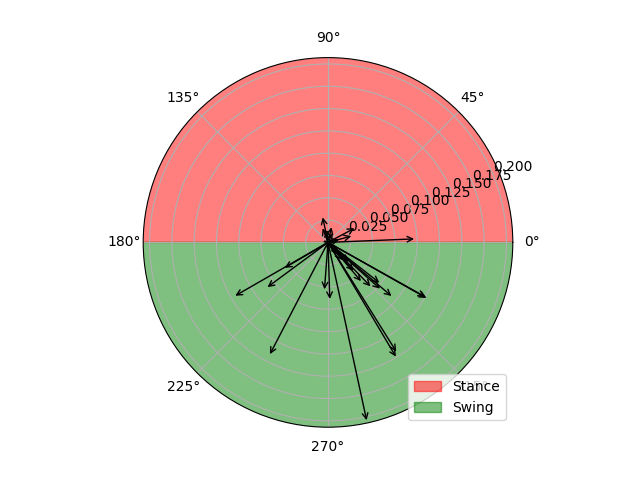

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
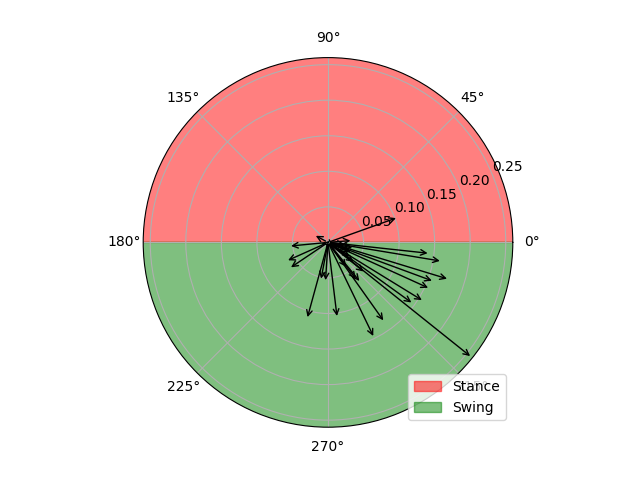

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
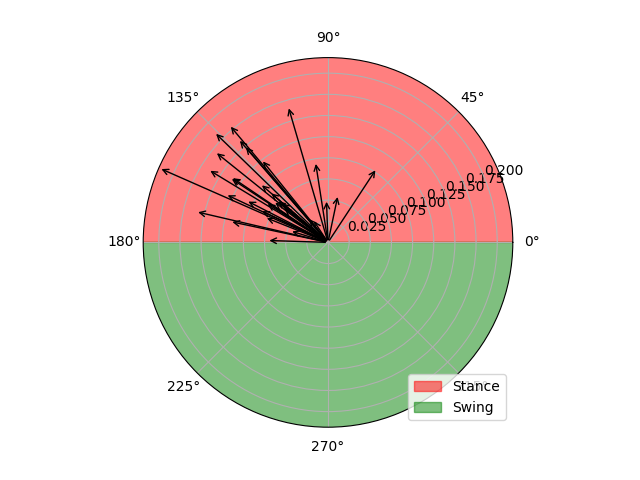

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
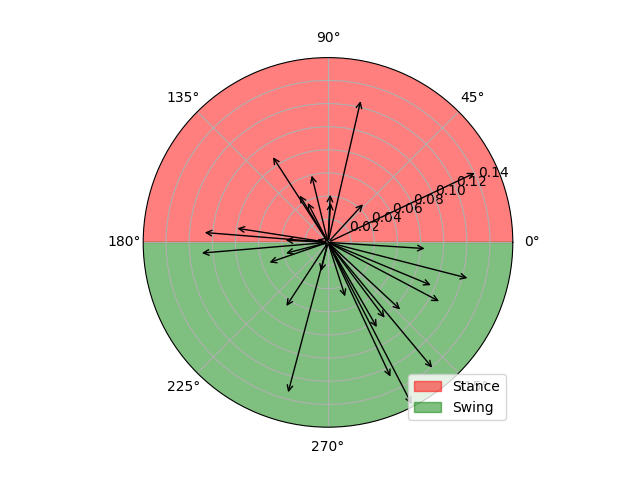

In [21]:
_, _ = rollie1129.DOM(angle_name = 'knee')
_, _ = rollie1209.DOM(angle_name = 'knee')
_, _ = rollie1216.DOM(angle_name = 'knee')
_, _ = rollie1220.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
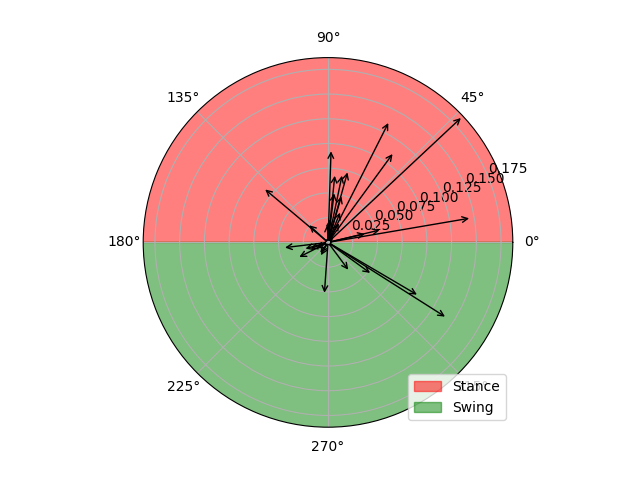

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
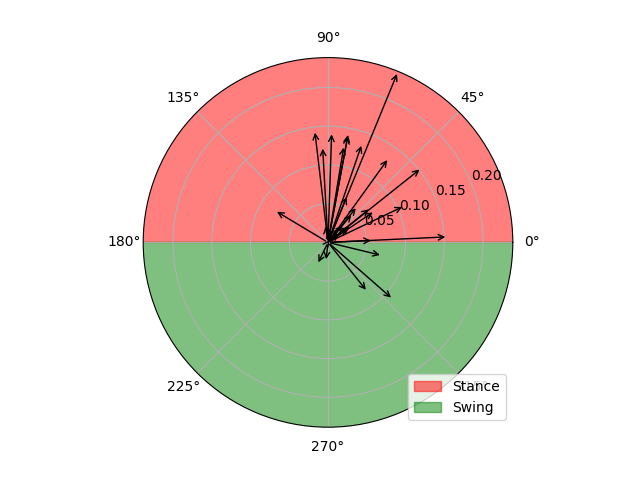

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
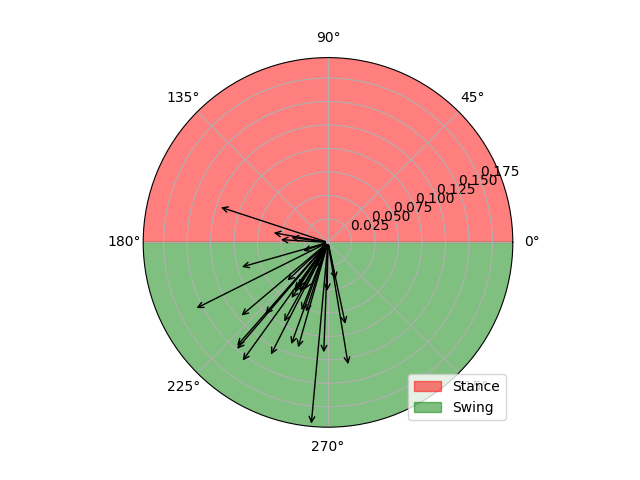

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
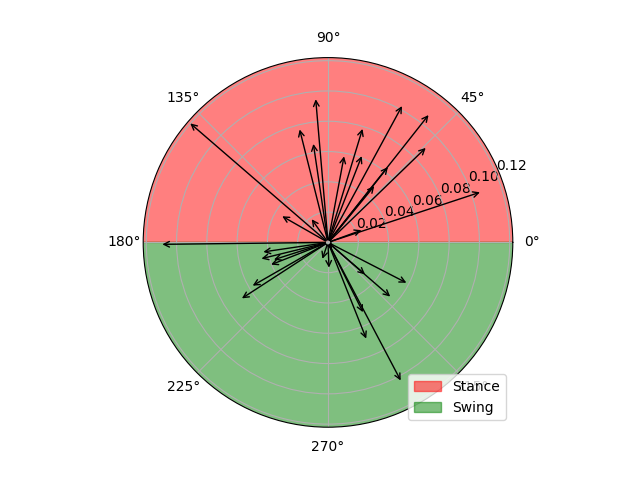

In [22]:
_, _ = rollie1129.DOM(angle_name = 'limbfoot')
_, _ = rollie1209.DOM(angle_name = 'limbfoot')
_, _ = rollie1216.DOM(angle_name = 'limbfoot')
_, _ = rollie1220.DOM(angle_name = 'limbfoot')